# Extração via API IBGE

Descrição: Evolutivo de registros com o nome "Enzo"
Fonte: IBGE

In [93]:
import pandas as pd
import requests

In [94]:
url = 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/enzo?sexo=M'

response = requests.request('GET', url = url)

In [95]:
data_json = response.json()[0]['res']
data_json

[{'periodo': '1930[', 'frequencia': 21},
 {'periodo': '[1930,1940[', 'frequencia': 43},
 {'periodo': '[1940,1950[', 'frequencia': 63},
 {'periodo': '[1950,1960[', 'frequencia': 139},
 {'periodo': '[1960,1970[', 'frequencia': 188},
 {'periodo': '[1970,1980[', 'frequencia': 270},
 {'periodo': '[1980,1990[', 'frequencia': 469},
 {'periodo': '[1990,2000[', 'frequencia': 2073},
 {'periodo': '[2000,2010[', 'frequencia': 43584}]

In [96]:
enzo_df = pd.DataFrame(data_json)
enzo_df

,periodo,frequencia
0,1930[,21
1,"[1930,1940[",43
2,"[1940,1950[",63
3,"[1950,1960[",139
4,"[1960,1970[",188
5,"[1970,1980[",270
6,"[1980,1990[",469
7,"[1990,2000[",2073
8,"[2000,2010[",43584


[Text(0.5, 0, ''), Text(0, 0.5, '')]

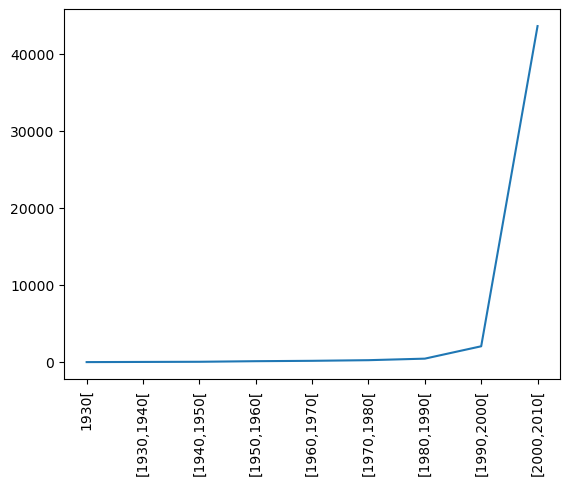

In [97]:
import seaborn as sns
from matplotlib import pyplot as plt

grafico = sns.lineplot(data = enzo_df, x = 'periodo', y = 'frequencia')
plt.xticks(rotation = 90)
grafico.set(xlabel=None, ylabel=None)

In [98]:
enzo_df['%_variacao'] = ((enzo_df['frequencia'] / enzo_df['frequencia'].shift(1) - 1) * 100).apply(lambda x: f'{x:.0f}%' if pd.notnull(x) else x)

enzo_df['var_abs'] = (enzo_df['frequencia'] - enzo_df['frequencia'].shift(1)).apply(lambda x: f'{x:.0f}' if pd.notnull(x) else x)
enzo_df

,periodo,frequencia,%_variacao,var_abs
0,1930[,21,NaN,NaN
1,"[1930,1940[",43,105%,22
2,"[1940,1950[",63,47%,20
3,"[1950,1960[",139,121%,76
4,"[1960,1970[",188,35%,49
5,"[1970,1980[",270,44%,82
6,"[1980,1990[",469,74%,199
7,"[1990,2000[",2073,342%,1604
8,"[2000,2010[",43584,2002%,41511
